In [1]:
import numpy as np
import pandas as pd
from scipy.signal import find_peaks

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load csv data as a dataframe
df = pd.read_csv('field_reads.csv')

# Create dataframes for each set of interest
df_zero = df.iloc[:, :2]

df_quad = df.iloc[:, -2:]

df_zeeman = df.iloc[:,2:-2]

In [3]:
# Data object to hold results
results = []

## Zero field transition

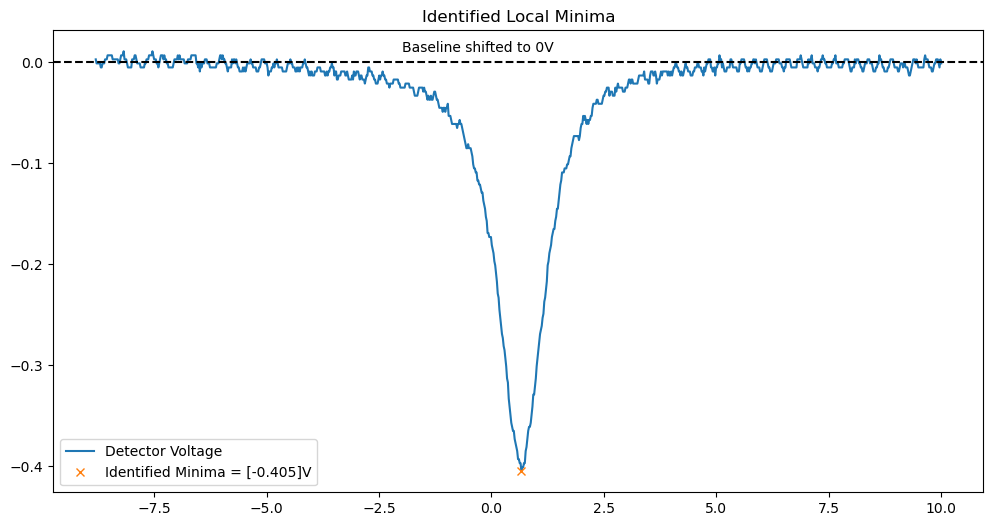

Sweep Voltage at Minimas = [0.66586587]V
Detector Voltage at Minimas = [-0.405]V


In [4]:
# Extract the original sweep data for the column to be used as the new x-axis
original_x_values = df_zero[df_zero.columns[0]].values

# Generate new x-values with 1000 points spaced evenly between the min and max of the original x-values
new_x_values = np.linspace(original_x_values.min(), original_x_values.max(), 1000)

# Pull detector reading data, then negate to make minimum maximum (to work with find_peaks function)
data_zero = df_zero[df_zero.columns[1]].values
inverted_data_zero = -np.array(data_zero)

# Find peaks in the inverted data (thus, minimums since it is inverted;
# Adjust parameters as needed; Note: '_' is a necessary empty return value holder
zero_peak, _ = find_peaks(inverted_data_zero, distance = 50, prominence=0.1)  # Adjust prominence and distance using graph above

# Get baseline voltage from the average of the first and last 5 measurements
baseline = round((sum(data_zero[:5]) + sum(data_zero[-5:]))/10,3)

# Shift the entire graph down by baseline for cleaner calculation of voltage drop at detector
data_zero = data_zero - baseline

# Get list of minima values
minimas = data_zero[zero_peak]

# Plotting to check accuracy (can comment out after peaks confirmed)
plt.figure(figsize=(12, 6))
plt.plot(new_x_values, data_zero, label='Detector Voltage')
plt.plot(new_x_values[zero_peak], minimas, "x", label=f'Identified Minima = {[round(x,3) for x in minimas]}V')
plt.title('Identified Local Minima')
plt.legend()

# Adding in the baseline
plt.axhline(0, color = 'black', linestyle = 'dashed')
plt.text(-2,.01,f'Baseline shifted to 0V')

plt.show()

print(f"Sweep Voltage at Minimas = {new_x_values[zero_peak]}V")
print(f"Detector Voltage at Minimas = {df_zero.iloc[zero_peak,1].values-baseline}V")

for i in range(len(minimas)):
        results.append({'Zero Field':
                {new_x_values[zero_peak][i]:minimas[i]}})

In [5]:
results

[{'Zero Field': {0.6658658658658663: -0.40499999999999997}}]

## Zeemans:

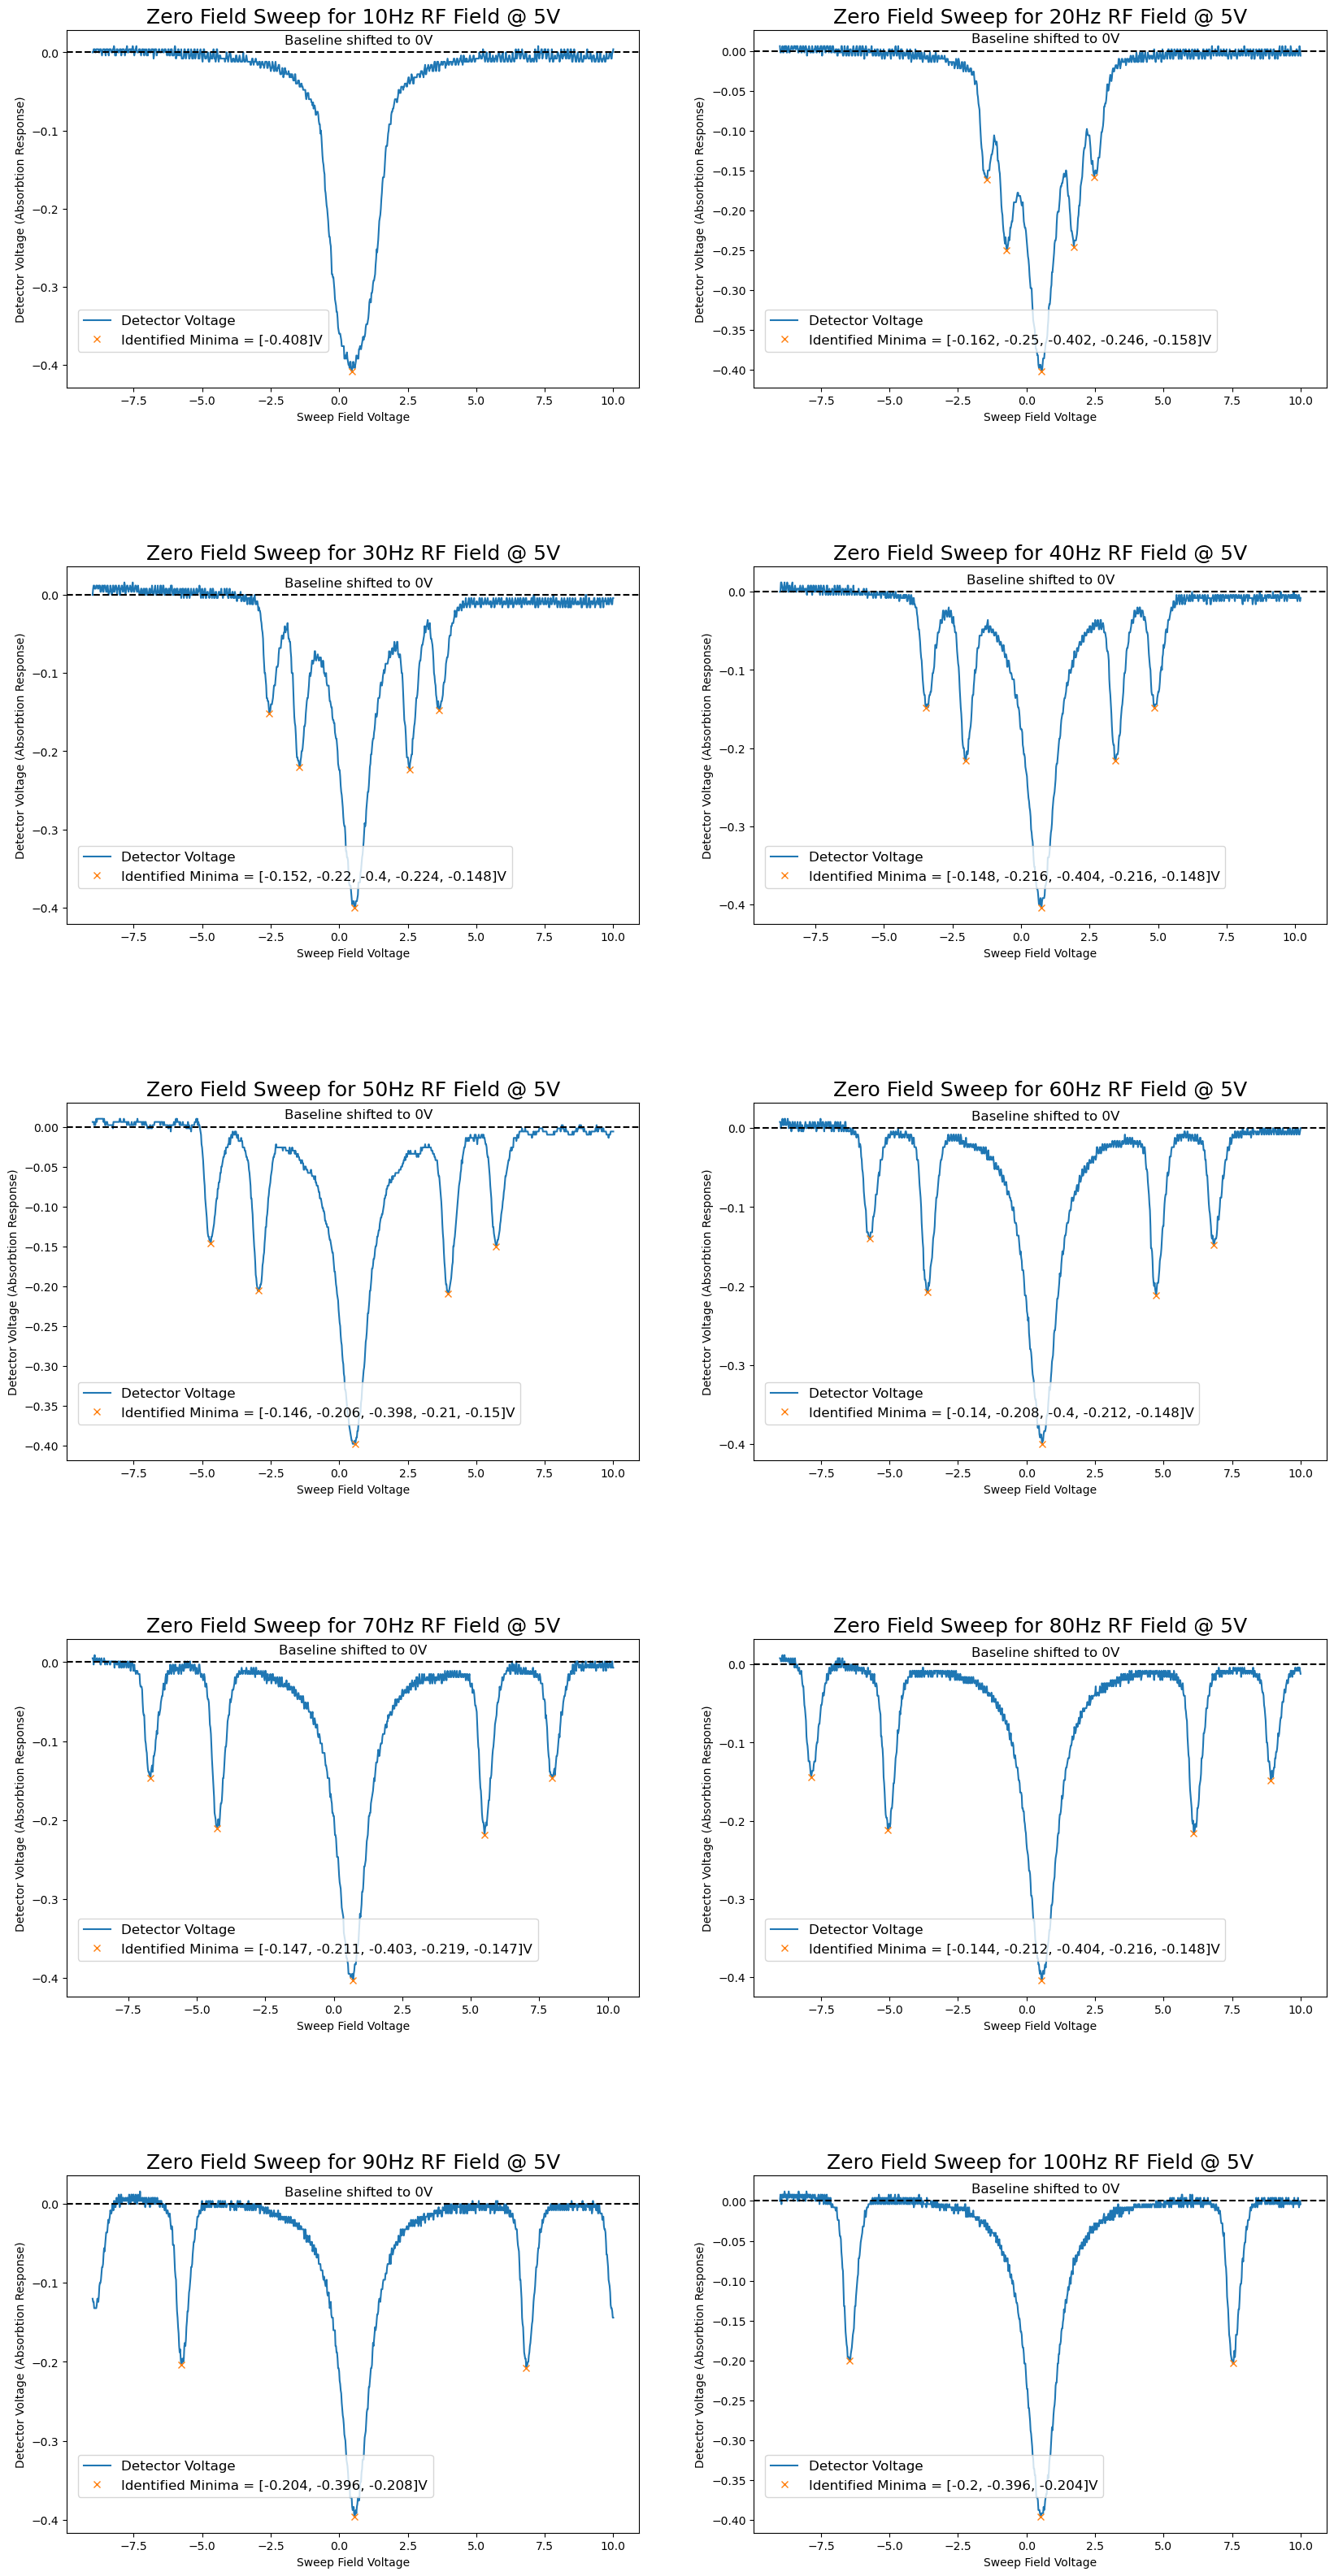

In [6]:
# Setup the subplot grid
fig, axs = plt.subplots(5, 2, figsize=(20, 40))  # Adjust figsize to fit your screen/desired output size
axs = axs.flatten()  # Flatten the array of axes to easily access them in a loop

plt.rcParams.update({'font.size': 12})  # Default font size for all text
plt.rcParams.update({'axes.titlesize': 18})  # Font size of the titles
plt.rcParams.update({'axes.labelsize': 14})  # Font size of the x and y labels

# Looping through pairs of columns
for i in range(0, len(df_zeeman.columns), 2):
    ax = axs[i // 2]

    # Extract the original data for the column to be used as the new x-axis
    original_x_values = df_zeeman[df_zeeman.columns[i]].values
    # Generate new x-values with 1000 points spaced evenly between the min and max of the original x-values
    new_x_values = np.linspace(original_x_values.min(), original_x_values.max(), 1000)
    
    # Pull the y-values from the detector response
    y_values = df_zeeman[df_zeeman.columns[i + 1]].values
    # Invert the data
    inverted_data_zeeman = -np.array(y_values)
    
    # Find peaks in the inverted data, adjust parameters as needed; '_' is a necessary empty return value holder
    peaks, _ = find_peaks(inverted_data_zeeman, distance = 20, prominence=0.05)  # Adjust prominence and distance using graph above

    # Get baseline voltage from the first and last 5 measurements
    # Note that 90Hz has to be netered manuially due to boundary condition issues
    if df_zeeman.columns[i] == '90-1':
        baseline = .1
    else:
        baseline = round((sum(y_values[:5]) + sum(y_values[-5:]))/10,3) 
        
    y_values = y_values - baseline
    
    minimas = y_values[peaks]
                    
    # Plot
    ax.plot(new_x_values, y_values, label='Detector Voltage')
    ax.plot(new_x_values[peaks],minimas,"x", label=f'Identified Minima = {[round(x,3) for x in minimas]}V')
    ax.set_xlabel('Sweep Field Voltage')  
    ax.set_ylabel('Detector Voltage (Absorbtion Response)')  
    title = df_zeeman.columns[i].split('-')[0]
    ax.set_title(f'Zero Field Sweep for {title}Hz RF Field @ 5V')
    ax.axhline(0, color = 'black', linestyle = 'dashed')
    ax.text(-2,.01,f'Baseline shifted to 0V')
    ax.legend(loc = (.02,.1))
    
    for i in range(len(minimas)):
        results.append({f'Zeeman {title}Hz':
                        {new_x_values[peaks][i]:minimas[i]}})
    
fig.subplots_adjust(hspace=.5)  # Adjust this value to increase spacing between rows

plt.show()  # Display the plot grid

In [7]:
results

[{'Zero Field': {0.6658658658658663: -0.40499999999999997}},
 {'Zeeman 10Hz': {0.45245245245245336: -0.408}},
 {'Zeeman 20Hz': {-1.4494494494494488: -0.162}},
 {'Zeeman 20Hz': {-0.7267267267267261: -0.25}},
 {'Zeeman 20Hz': {0.5475475475475484: -0.40199999999999997}},
 {'Zeeman 20Hz': {1.726726726726728: -0.246}},
 {'Zeeman 20Hz': {2.468468468468469: -0.158}},
 {'Zeeman 30Hz': {-2.5525525525525516: -0.152}},
 {'Zeeman 30Hz': {-1.4494494494494488: -0.22}},
 {'Zeeman 30Hz': {0.5665665665665678: -0.39999999999999997}},
 {'Zeeman 30Hz': {2.563563563563564: -0.224}},
 {'Zeeman 30Hz': {3.6476476476476485: -0.148}},
 {'Zeeman 40Hz': {-3.4746746746746746: -0.14800000000000002}},
 {'Zeeman 40Hz': {-2.0292292292292293: -0.216}},
 {'Zeeman 40Hz': {0.7285285285285283: -0.404}},
 {'Zeeman 40Hz': {3.429229229229229: -0.216}},
 {'Zeeman 40Hz': {4.8556556556556565: -0.14800000000000002}},
 {'Zeeman 50Hz': {-4.701701701701701: -0.14600000000000002}},
 {'Zeeman 50Hz': {-2.9519519519519513: -0.2060000000

## Quadratic Zeeman

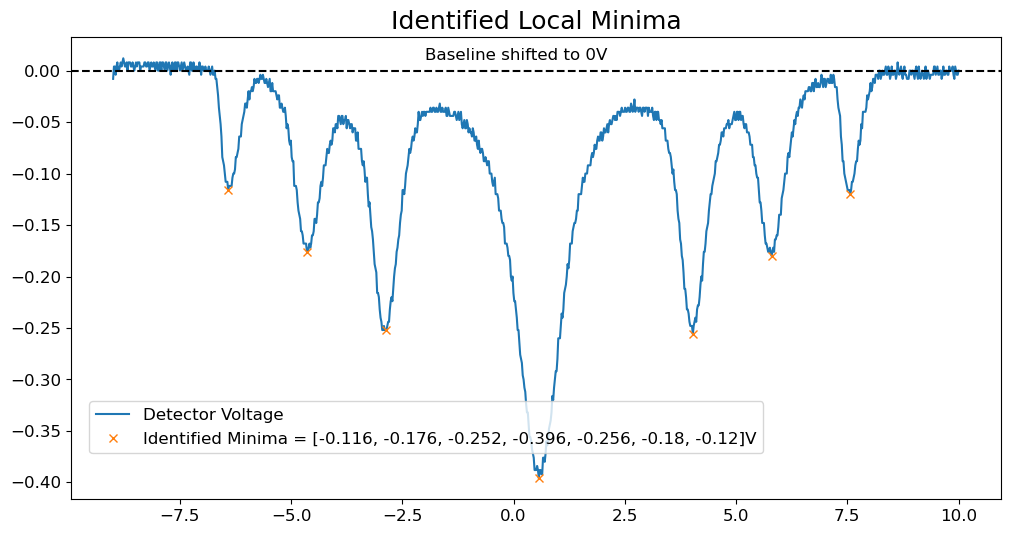

Sweep Voltage at Minimas = [-6.4 -4.4 -3.   0.6  4.   5.8  7.4]V
Detector Voltage at Minimas = [-0.116 -0.176 -0.252 -0.396 -0.256 -0.18  -0.12 ]V


In [8]:
# Extract the original sweep data for the column to be used as the new x-axis
original_x_values = df_quad[df_quad.columns[0]].values

# Generate new x-values with 1000 points spaced evenly between the min and max of the original x-values
new_x_values = np.linspace(original_x_values.min(), original_x_values.max(), 1000)

# Pull detector reading data, then negate to make minimum maximum (to work with find_peaks function)
data_quad = df_quad[df_quad.columns[1]].values
inverted_data_quad = -np.array(data_quad)

# Find peaks in the inverted data (thus, minimums since it is inverted;
# Adjust parameters as needed; Note: '_' is a necessary empty return value holder
peaks, _ = find_peaks(inverted_data_quad, distance = 50, prominence=0.1)  # Adjust prominence and distance using graph above

# Get baseline voltage from the average of the first and last 5 measurements
baseline = round((sum(data_quad[:5]) + sum(data_quad[-5:]))/10,3)

# Shift the entire graph down by baseline for cleaner calculation of voltage drop at detector
data_quad = data_quad - baseline

# Get list of minima values
minimas = data_quad[peaks]

# Plotting to check accuracy (can comment out after peaks confirmed)
plt.figure(figsize=(12, 6))
plt.plot(new_x_values, data_quad, label='Detector Voltage')
plt.plot(new_x_values[peaks], data_quad[peaks], "x", label=f'Identified Minima = {[round(x,3) for x in minimas]}V')
plt.title('Identified Local Minima')
plt.legend(loc = (.02,.1))

# Adding in the baseline
plt.axhline(0, color = 'black', linestyle = 'dashed')
plt.text(-2,.01,f'Baseline shifted to 0V')

plt.show()

print(f"Sweep Voltage at Minimas = {df_quad.iloc[peaks,0].values}V")
print(f"Detector Voltage at Minimas = {df_quad.iloc[peaks,1].values-baseline}V")

for i in range(len(minimas)):
        results.append({'Quadratic Zeeman':
                        {new_x_values[peaks][i]:minimas[i]}})

In [9]:
results

[{'Zero Field': {0.6658658658658663: -0.40499999999999997}},
 {'Zeeman 10Hz': {0.45245245245245336: -0.408}},
 {'Zeeman 20Hz': {-1.4494494494494488: -0.162}},
 {'Zeeman 20Hz': {-0.7267267267267261: -0.25}},
 {'Zeeman 20Hz': {0.5475475475475484: -0.40199999999999997}},
 {'Zeeman 20Hz': {1.726726726726728: -0.246}},
 {'Zeeman 20Hz': {2.468468468468469: -0.158}},
 {'Zeeman 30Hz': {-2.5525525525525516: -0.152}},
 {'Zeeman 30Hz': {-1.4494494494494488: -0.22}},
 {'Zeeman 30Hz': {0.5665665665665678: -0.39999999999999997}},
 {'Zeeman 30Hz': {2.563563563563564: -0.224}},
 {'Zeeman 30Hz': {3.6476476476476485: -0.148}},
 {'Zeeman 40Hz': {-3.4746746746746746: -0.14800000000000002}},
 {'Zeeman 40Hz': {-2.0292292292292293: -0.216}},
 {'Zeeman 40Hz': {0.7285285285285283: -0.404}},
 {'Zeeman 40Hz': {3.429229229229229: -0.216}},
 {'Zeeman 40Hz': {4.8556556556556565: -0.14800000000000002}},
 {'Zeeman 50Hz': {-4.701701701701701: -0.14600000000000002}},
 {'Zeeman 50Hz': {-2.9519519519519513: -0.2060000000

In [19]:
from collections import defaultdict
# Initialize a defaultdict of dictionaries
combined_data = defaultdict(dict)

# Iterate over each dictionary in the list and combine them
for d in results:
    for key, inner_dict in d.items():
        combined_data[key].update(inner_dict)

# Convert defaultdict back to a regular dictionary if necessary
combined_data = dict(combined_data)

df_data = pd.DataFrame(list(combined_data.items()), columns=['Frequency', 'Data'])

df_data

,Frequency,Data
0,Zero Field,{0.6658658658658663: -0.40499999999999997}
1,Zeeman 10Hz,{0.45245245245245336: -0.408}
2,Zeeman 20Hz,"{-1.4494494494494488: -0.162, -0.7267267267267..."
3,Zeeman 30Hz,"{-2.5525525525525516: -0.152, -1.4494494494494..."
4,Zeeman 40Hz,"{-3.4746746746746746: -0.14800000000000002, -2..."
5,Zeeman 50Hz,"{-4.701701701701701: -0.14600000000000002, -2...."
6,Zeeman 60Hz,"{-5.728728728728728: -0.13999999999999999, -3...."
7,Zeeman 70Hz,"{-6.68888888888889: -0.147, -4.254454454454454..."
8,Zeeman 80Hz,"{-7.858858858858859: -0.144, -5.06306306306306..."
9,Zeeman 90Hz,"{-5.766766766766766: -0.20400000000000001, 0.5..."


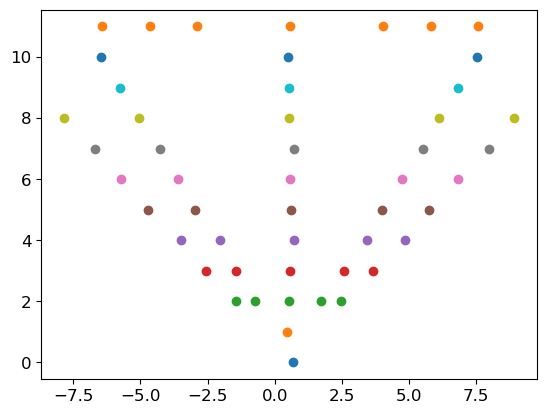

In [32]:
for i in range(len(df_data)):
    vals = list(df_data.iloc[i,1].keys())
    x_vals = [i]*len(vals)
    plt.scatter(vals,x_vals)
plt.show()